In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import sys

%load_ext autoreload
%autoreload 2

sys.path.append('../')
import src.read_raw as rr
import src.plot_profiles as pp

In [3]:
vmrCO2 = 0.949
vmrN2 = 0.0279
vmrAr = 0.0208
N2Ar = (0.37*2)**-1
NAold = (0.51*2)**-1
Vik = (0.3*2)**-1

SAM_ArCO2 = vmrAr/vmrCO2
SAM_ArCO2_a = vmrAr/(vmrCO2+vmrCO2*0.15)
SAM_ArCO2_b = vmrAr/(vmrCO2-vmrCO2*0.15)
print SAM_ArCO2_a, SAM_ArCO2, SAM_ArCO2_b
SAM_N2CO2 = vmrN2/vmrCO2
SAM_N2CO2_a = vmrN2/(vmrCO2+vmrCO2*0.15)
SAM_N2CO2_b = vmrN2/(vmrCO2-vmrCO2*0.15)
print SAM_N2CO2_a, SAM_N2CO2, SAM_N2CO2_b
print N2Ar

0.0190589636689 0.0219178082192 0.0257856567284
0.0255646676135 0.0293993677555 0.0345874914771
1.35135135135


In [8]:
with open('../DD1.dat') as f:
    files = [x.strip() for x in f]
        
bin_df = rr.combine_files(files,io='I')  # inbound only
bin_df_re = rr.realign(bin_df) # convert sp and abun columns to species-specific abunds
bin_df_re = bin_df_re[bin_df_re['orbit']<6974]

In [9]:
print(bin_df_re['orbit'].unique())
bin_df_re[['alt','orbit','abundance_Ar','abundance_CO2']].head()

[713 714 715 716 717 718 719 720 721 722 723 724 725 726 727 728 729 730
 731 732 733 734 735 736 737 738 739 740 741 742 743 744 745 746 747]


,alt,orbit,abundance_Ar,abundance_CO2
0,495.0434,713,NaN,NaN
1,493.1250,713,NaN,NaN
2,491.2105,713,NaN,NaN
3,489.2999,713,NaN,NaN
4,487.3931,713,NaN,NaN


In [21]:
bin_df_re['N2/Ar'] = bin_df_re['abundance_N2']/bin_df_re['abundance_Ar']
bin_df_re['N2/CO2'] = bin_df_re['abundance_N2']/bin_df_re['abundance_CO2']
bin_df_re['Ar/CO2'] = bin_df_re['abundance_Ar']/bin_df_re['abundance_CO2']
bins = np.arange(bin_df_re['alt'].min(),300,5)
bin_mid = (bins[1:]+bins[:-1])/2.
bin_df_re['bin_alt'] = pd.cut(bin_df_re['alt'],bins,labels=bin_mid)
bin_mean = bin_df_re[['bin_alt','alt','N2/Ar','N2/CO2','Ar/CO2']+['abundance_'+s for s in ['N2','Ar','CO2']]].groupby('bin_alt').mean()
bin_std = bin_df_re[['bin_alt','alt','N2/Ar','N2/CO2','Ar/CO2']+['abundance_'+s for s in ['N2','Ar','CO2']]].groupby('bin_alt').std()
binned = pd.merge(bin_mean.reset_index(),bin_std.reset_index(),on='bin_alt',suffixes=['_mean','_std']).drop('alt_std',axis=1)
binned.sort('bin_alt').head()


,bin_alt,alt_mean,N2/Ar_mean,N2/CO2_mean,Ar/CO2_mean,abundance_N2_mean,abundance_Ar_mean,abundance_CO2_mean,N2/Ar_std,N2/CO2_std,Ar/CO2_std,abundance_N2_std,abundance_Ar_std,abundance_CO2_std
0,129.7065,129.757784,1.382351,0.038859,0.029333,1.571458e+09,1.250740e+09,4.164193e+10,0.335222,0.005444,0.006592,4.609311e+08,5.778900e+08,1.454384e+10
1,134.7065,134.792424,1.638621,0.042770,0.026264,9.226741e+08,5.964735e+08,2.296884e+10,0.250511,0.007251,0.003384,3.279858e+08,2.824273e+08,1.078927e+10
2,139.7065,139.560133,1.812483,0.046323,0.025547,5.636624e+08,3.269316e+08,1.327859e+10,0.253161,0.009764,0.003835,1.905483e+08,1.418215e+08,6.672170e+09
3,144.7065,144.628229,2.061625,0.053347,0.025655,3.250929e+08,1.634931e+08,6.788102e+09,0.261880,0.012756,0.004478,1.049101e+08,6.454144e+07,3.645048e+09
4,149.7065,149.640548,2.310443,0.063246,0.027135,2.095672e+08,9.382436e+07,3.598905e+09,0.322558,0.013439,0.003322,6.088188e+07,3.359647e+07,1.695134e+09


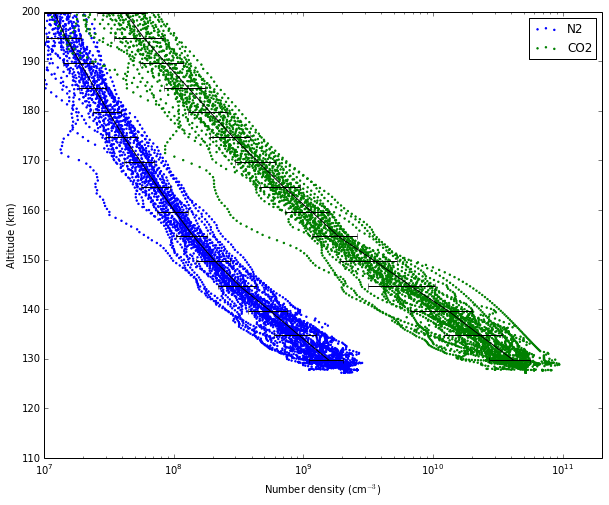

In [22]:
alldax = pp.density_plot(bin_df_re,species=['N2','CO2'])
alldax.figure.set_size_inches(10,8)
alldax.set_ylim(110,200)
alldax.set_xlim(1.e+7,2.e+11)
#alldax.errorbar(binned['abundance_Ar_mean'],binned['alt_mean'],xerr=binned['abundance_Ar_std'],color='k')
alldax.errorbar(binned['abundance_N2_mean'],binned['alt_mean'],xerr=binned['abundance_N2_std'],color='k')
alldax.errorbar(binned['abundance_CO2_mean'],binned['alt_mean'],xerr=binned['abundance_CO2_std'],color='k')
plt.show()

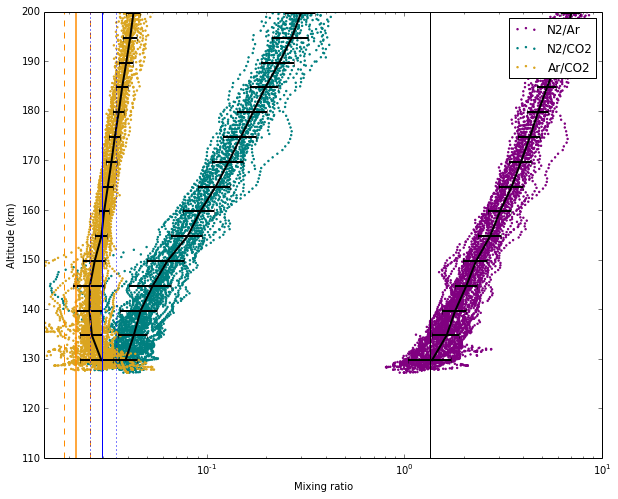

In [23]:
allmax = pp.mixing_plot(bin_df_re)

#allmax.errorbar(binned['abundance_N2_mean']/binned['abundance_Ar_mean'],binned['bin_alt'],
#                xerr=binned['abundance_N2_mean']/binned['abundance_Ar_mean']*np.sqrt((binned['abundance_N2_std']/binned['abundance_N2_mean'])**2+\
#                                                                                     (binned['abundance_Ar_std']/binned['abundance_Ar_mean'])**2-\
#                                                                                    2*(binned['covN2Ar']/(binned['abundance_Ar_mean']*binned['abundance_N2_mean']))),
#                color='k')
#allmax.errorbar(binned['abundance_N2_mean']/binned['abundance_CO2_mean'],binned['bin_alt'],
#                xerr=binned['abundance_N2_mean']/binned['abundance_CO2_mean']*np.sqrt((binned['abundance_CO2_std']/binned['abundance_CO2_mean'])**2+(binned['abundance_Ar_std']/binned['abundance_Ar_mean'])**2),color='k')
#allmax.errorbar(binned['abundance_Ar_mean']/binned['abundance_CO2_mean'],binned['bin_alt'],
#                xerr=binned['abundance_Ar_mean']/binned['abundance_CO2_mean']*np.sqrt((binned['abundance_Ar_std']/binned['abundance_Ar_mean'])**2+(binned['abundance_CO2_std']/binned['abundance_CO2_mean'])**2),color='k')

#allmax.plot(binned['abundance_N2_mean']/binned['abundance_Ar_mean'],binned['bin_alt'],'k-')
#allmax.plot(binned['abundance_N2_mean']/binned['abundance_CO2_mean'],binned['bin_alt'],'k-')
#allmax.plot(binned['abundance_Ar_mean']/binned['abundance_CO2_mean'],binned['bin_alt'],'k-')

allmax.errorbar(binned['N2/Ar_mean'],binned['bin_alt'],xerr=binned['N2/Ar_std'],color='k',lw=2)
allmax.errorbar(binned['N2/CO2_mean'],binned['bin_alt'],xerr=binned['N2/CO2_std'],color='k',lw=2)
allmax.errorbar(binned['Ar/CO2_mean'],binned['bin_alt'],xerr=binned['Ar/CO2_std'],color='k',lw=2)


allmax.figure.set_size_inches(10,8)
allmax.set_ylim(110,200)
allmax.set_xlim(1.5e-2,1.e+1)

allmax.plot([N2Ar,N2Ar],[110,200],'k-')
#allmax.plot([NAold,NAold],[110,200],'k--',lw=0.5)
#allmax.plot([Vik,Vik],[110,200],'k--',lw=0.5)

allmax.plot([SAM_ArCO2,SAM_ArCO2],[110,200],color='darkorange',ls='-',lw=1.5)
allmax.plot([SAM_ArCO2_a,SAM_ArCO2_a],[110,200],color='darkorange',ls='--',lw=1)
allmax.plot([SAM_ArCO2_b,SAM_ArCO2_b],[110,200],color='darkorange',ls='--',lw=1)

allmax.plot([SAM_N2CO2,SAM_N2CO2],[110,200],'b-',1.5)
allmax.plot([SAM_N2CO2_a,SAM_N2CO2_a],[110,200],'b:',lw=1)
allmax.plot([SAM_N2CO2_b,SAM_N2CO2_b],[110,200],'b:',lw=1)

#plt.savefig('/Users/masl3485/Desktop/DD9_raw.png',dpi=100)

plt.show()

In [ ]:
## DO SUBPLOTS

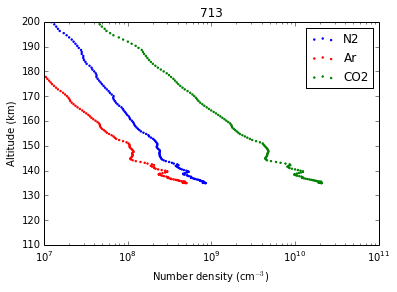

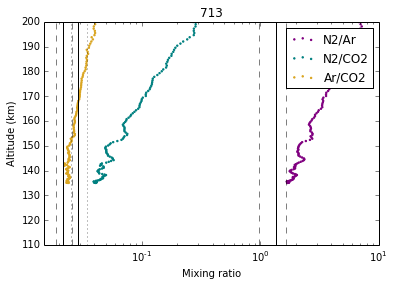

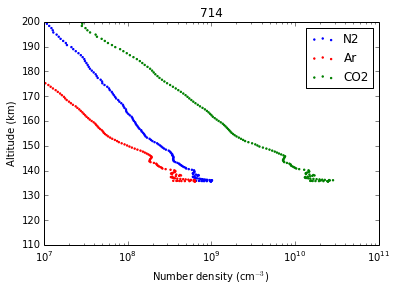

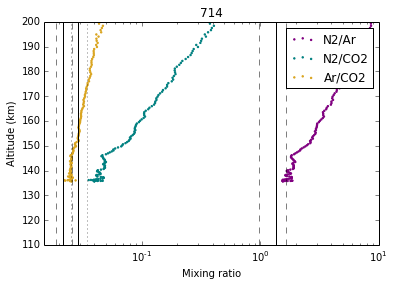

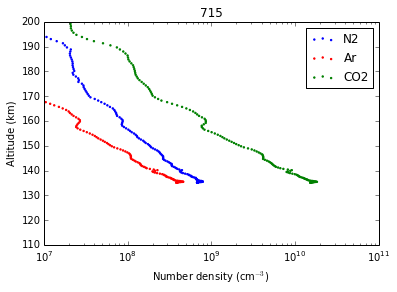

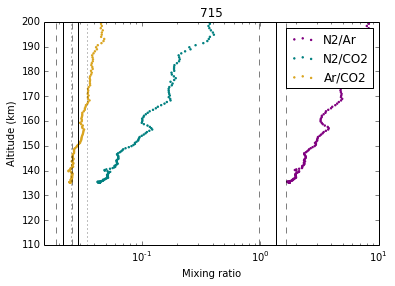

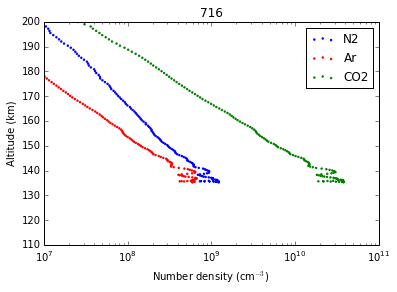

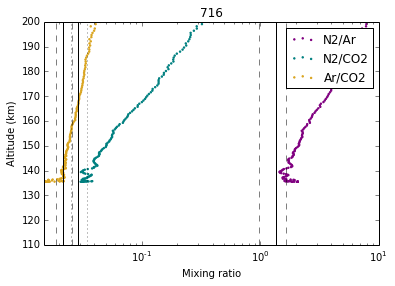

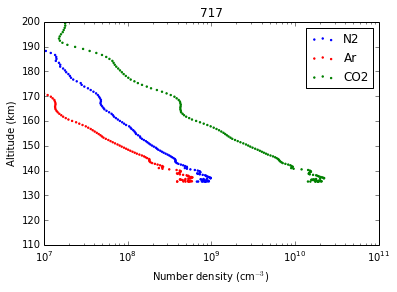

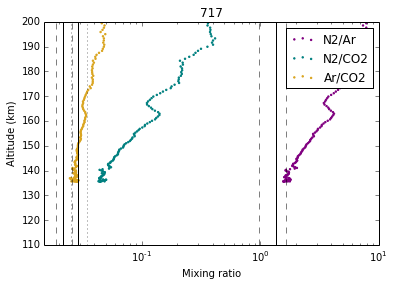

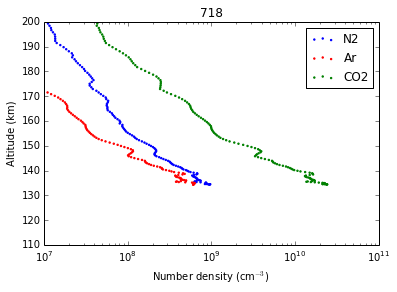

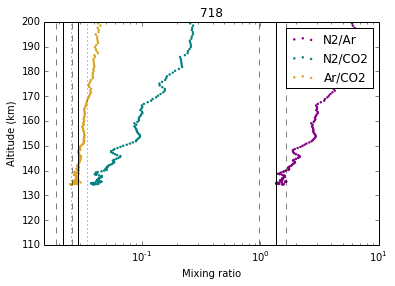

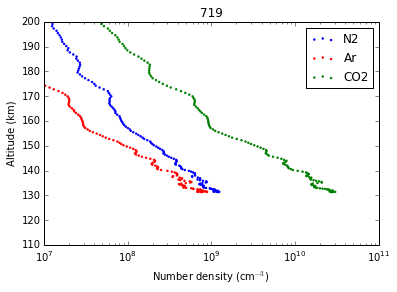

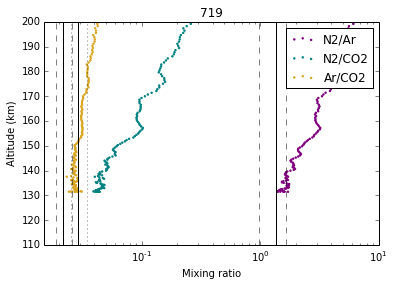

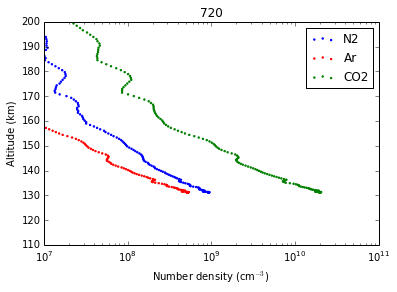

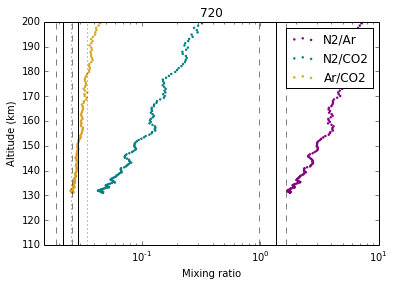

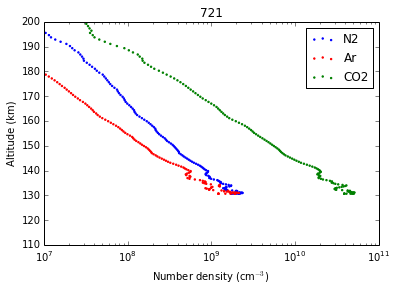

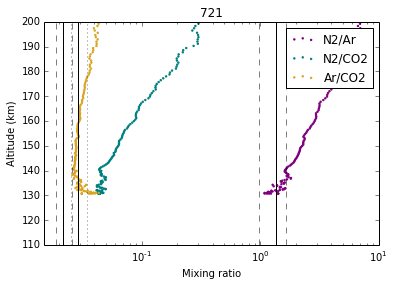

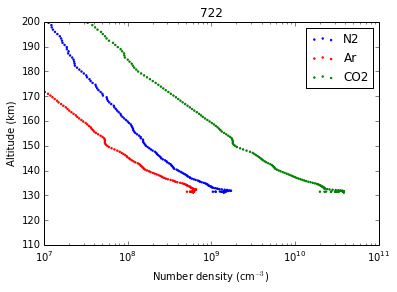

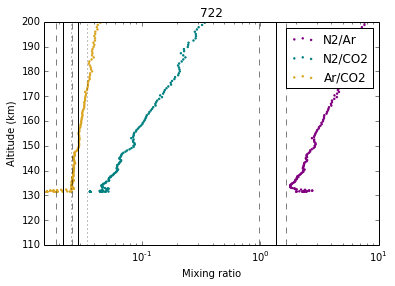

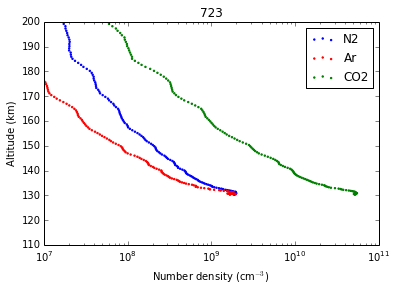

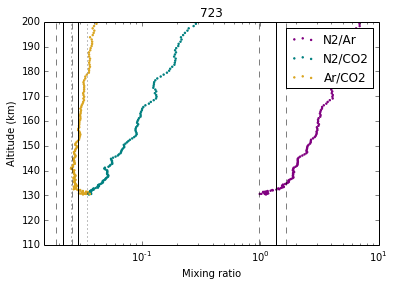

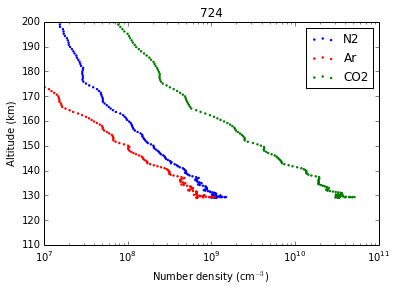

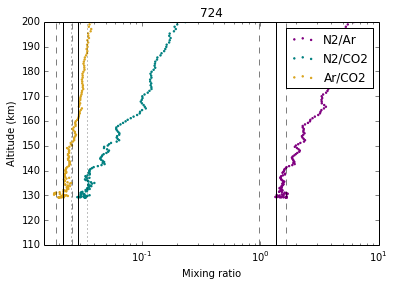

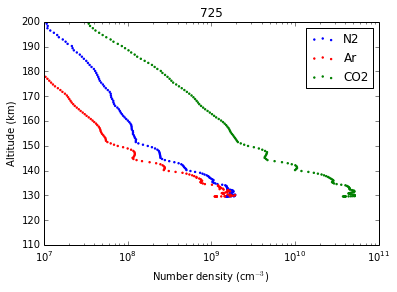

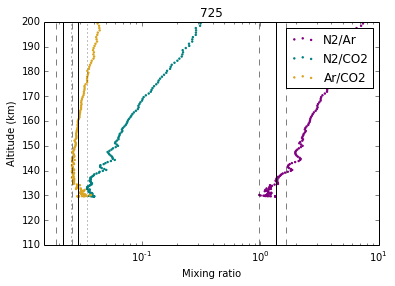

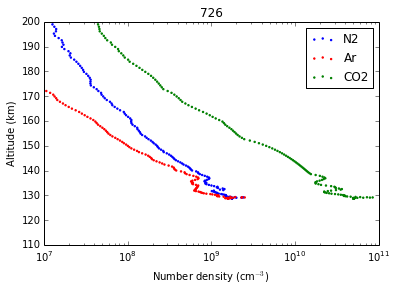

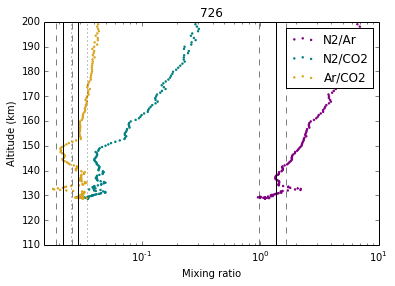

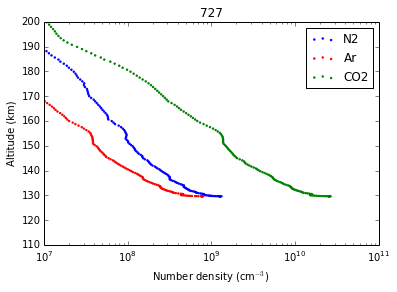

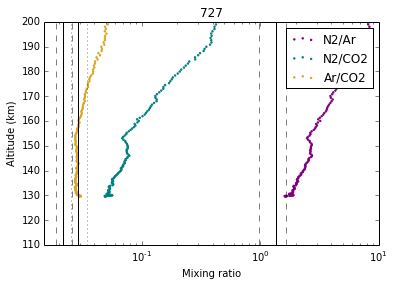

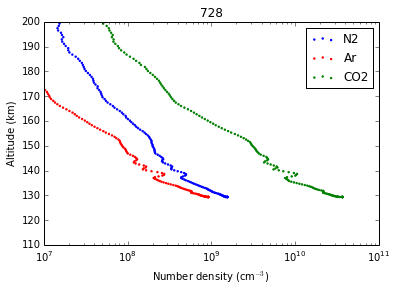

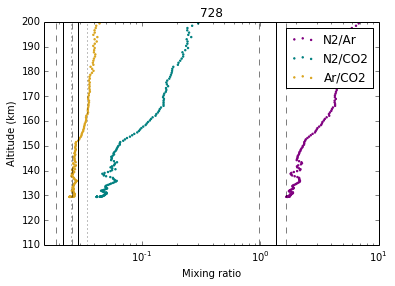

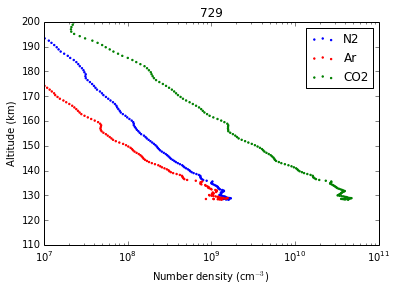

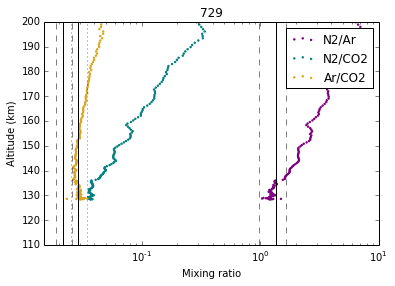

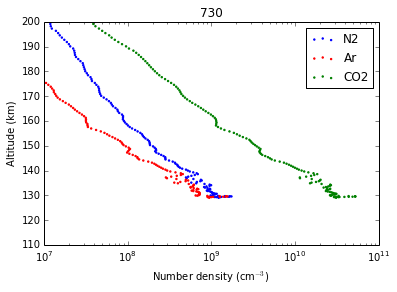

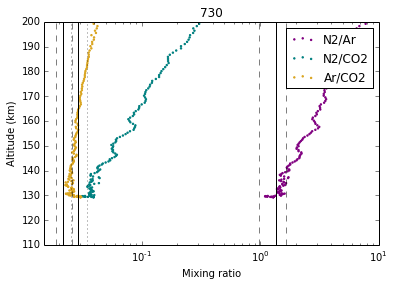

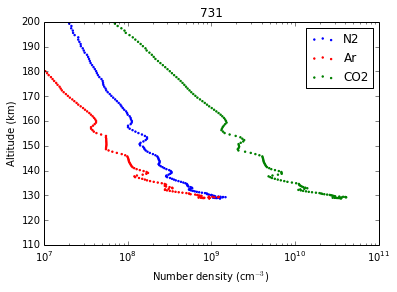

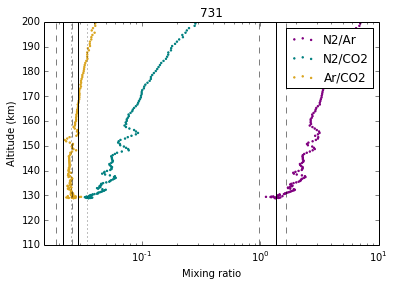

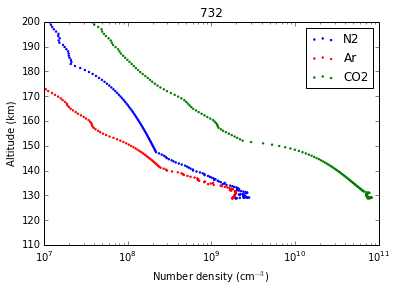

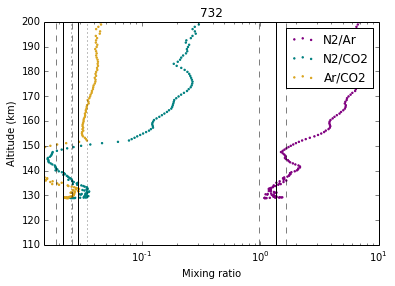

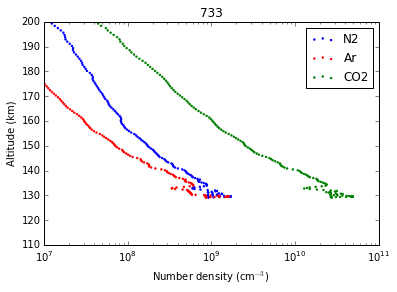

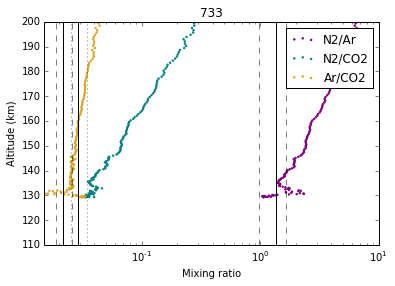

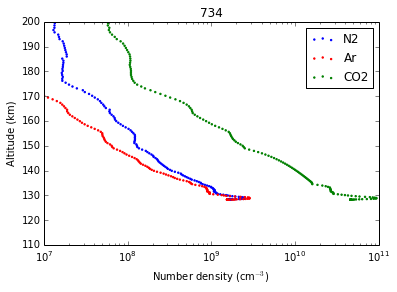

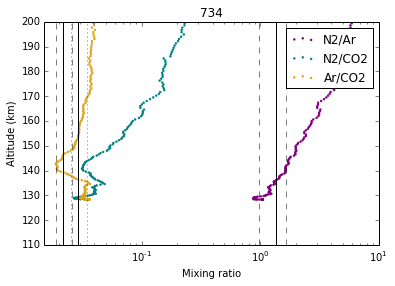

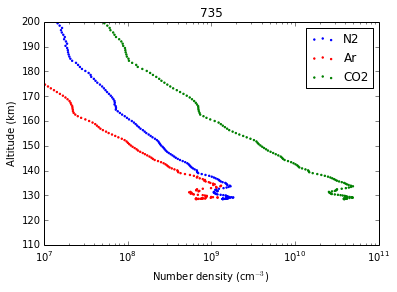

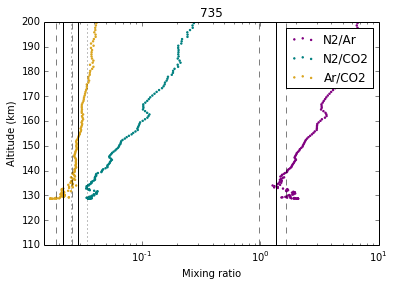

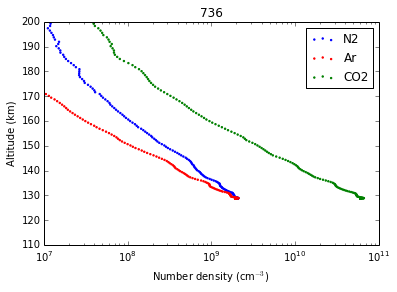

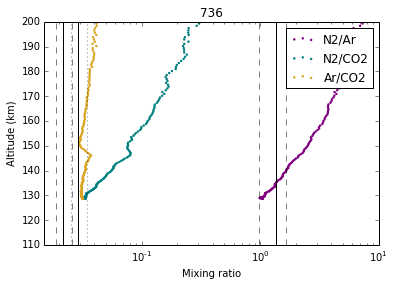

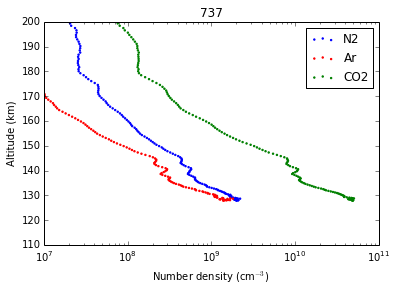

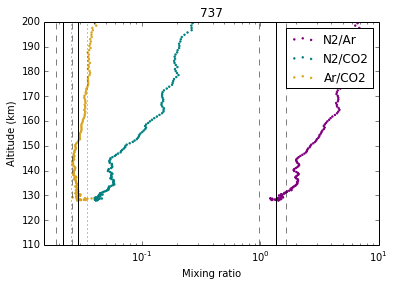

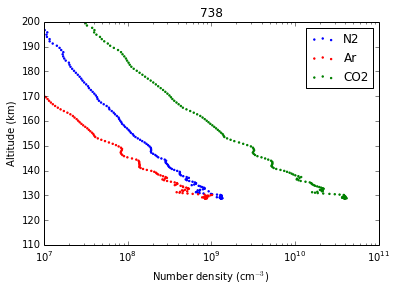

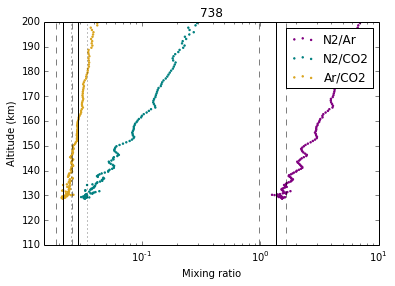

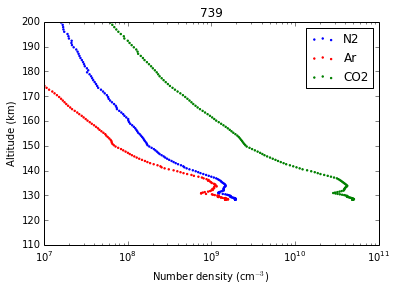

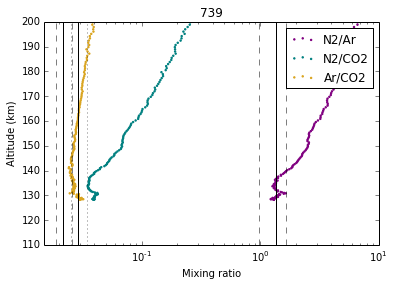

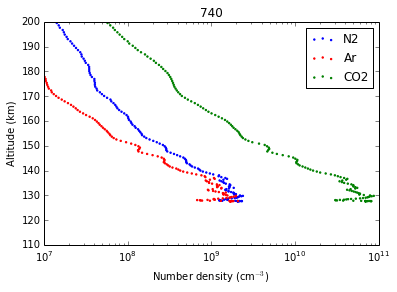

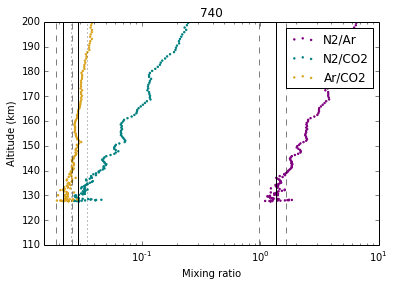

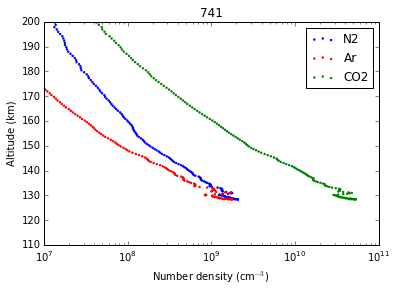

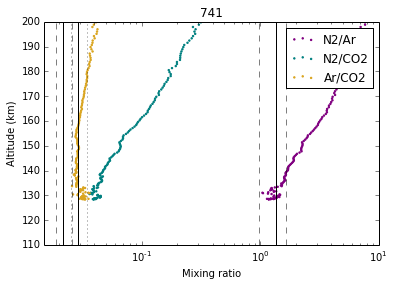

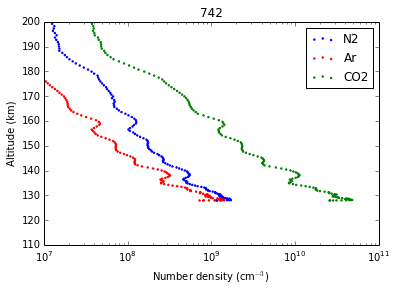

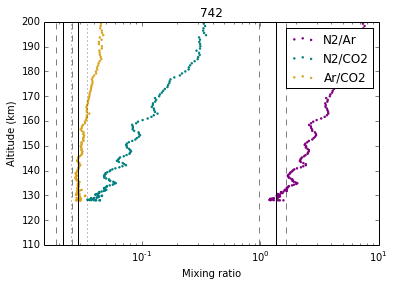

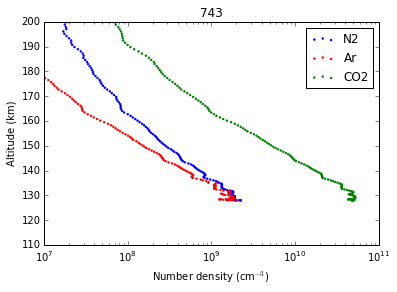

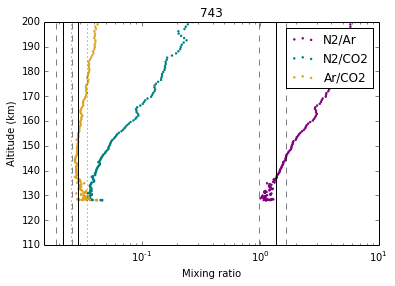

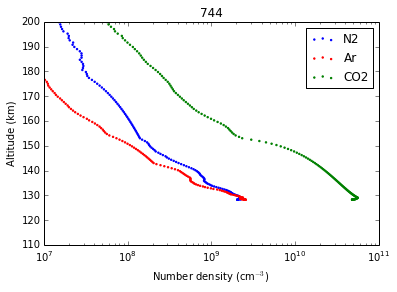

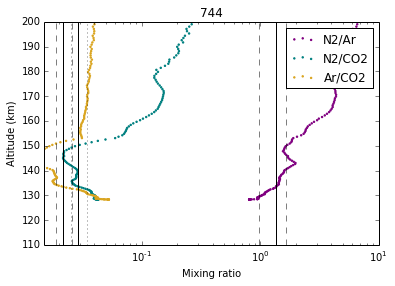

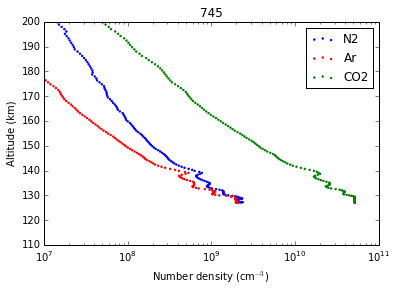

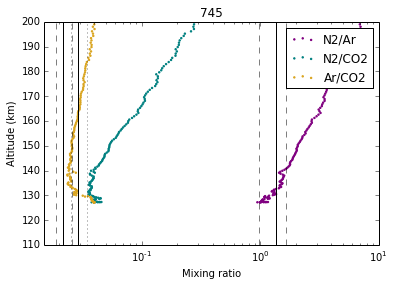

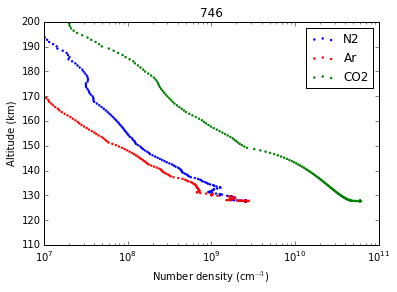

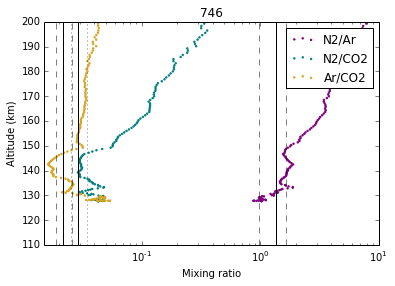

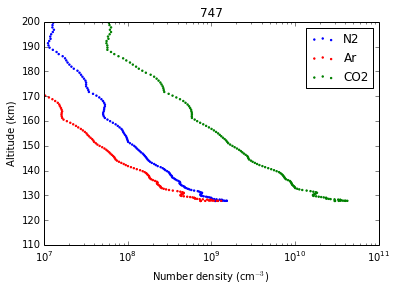

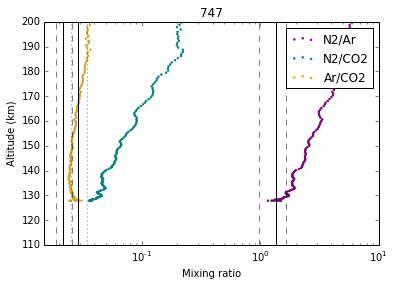

In [10]:
for orb, orbg in bin_df_re.groupby('orbit'):
    denax = pp.density_plot(orbg)
    denax.set_title(str(orb))
    denax.set_ylim(110,200)
    denax.set_xlim(1.e+7,1.e+11)
    mrax = pp.mixing_plot(orbg)
    mrax.set_title(str(orb))
    mrax.set_ylim(110,200)
    mrax.set_xlim(1.5e-2,1.e+1)
    
    mrax.plot([N2Ar,N2Ar],[110,200],'k-')
    mrax.plot([NAold,NAold],[110,200],'k--',lw=0.5)
    mrax.plot([Vik,Vik],[110,200],'k--',lw=0.5)
    
    mrax.plot([SAM_ArCO2,SAM_ArCO2],[110,200],'k-')
    mrax.plot([SAM_ArCO2_a,SAM_ArCO2_a],[110,200],'k--',lw=0.5)
    mrax.plot([SAM_ArCO2_b,SAM_ArCO2_b],[110,200],'k--',lw=0.5)
    
    mrax.plot([SAM_N2CO2,SAM_N2CO2],[110,200],'k-')
    mrax.plot([SAM_N2CO2_a,SAM_N2CO2_a],[110,200],'k:',lw=0.5)
    mrax.plot([SAM_N2CO2_b,SAM_N2CO2_b],[110,200],'k:',lw=0.5)